In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Loading the Titanic dataset
df = pd.read_csv('../data/titanic.csv')

# Sneak peek at the data
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
164,165,0,3,"Panula, Master. Eino Viljami",male,1.0,4,1,3101295,39.6875,NaN,S
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S
46,47,0,3,"Lennon, Mr. Denis",male,NaN,1,0,370371,15.5000,NaN,Q
389,390,1,2,"Lehmann, Miss. Bertha",female,17.0,0,0,SC 1748,12.0000,NaN,C


In [3]:
# Printing the shape (rows, columns) of the dataset
print("Shape:", df.shape)

# Displaying column info
df.info()

# Missing values 
print("\nMissing values:\n", df.isnull().sum())

Shape: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687


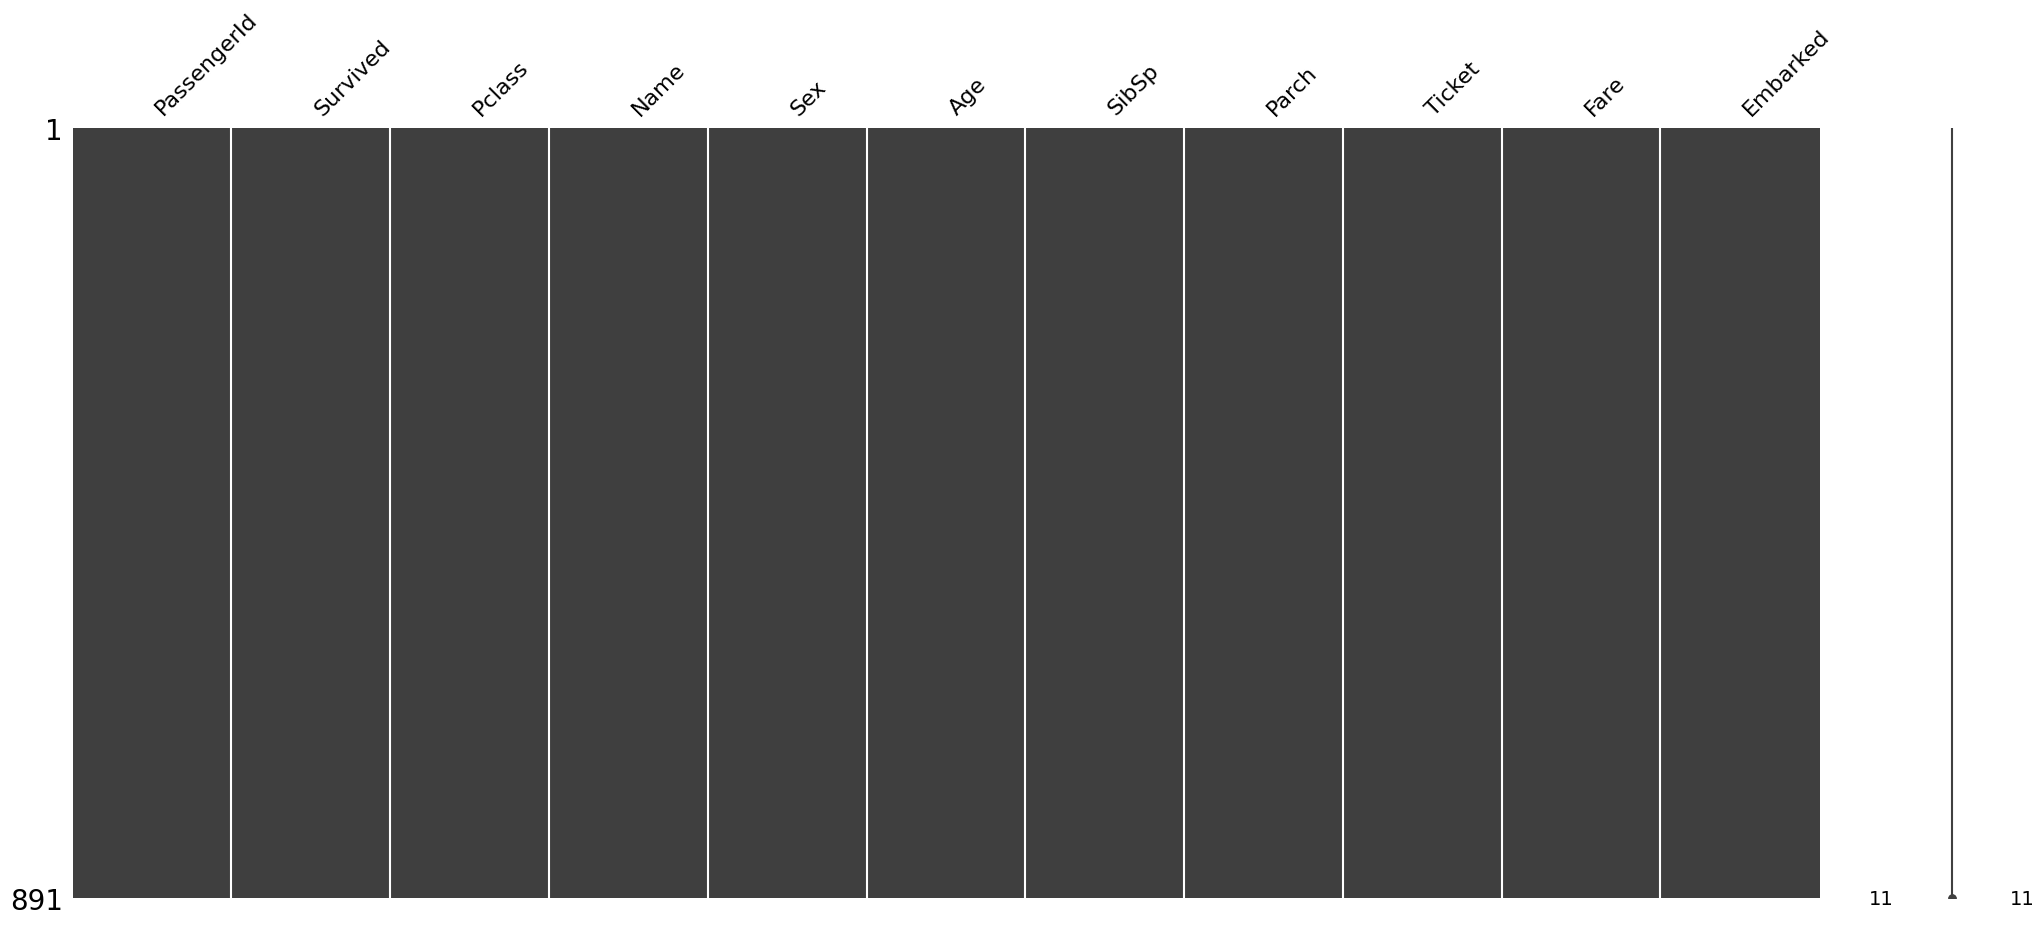

KeyError: "['Cabin'] not found in axis"

In [ ]:
msno.matrix(df)
plt.show()

# Dropping the 'Cabin' column for this analysis due to high number of missing values
df.drop(columns=['Cabin'], inplace=True)

# Filling missing values in 'Embarked' with the mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Filling missing values in 'Age' with the median
df['Age'].fillna(df['Age'].median(), inplace=True)

df.isna().sum()

C:\Users\Rodri\AppData\Local\Temp\ipykernel_8528\820473933.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Survived', palette=['#e74c3c', '#2ecc71'])


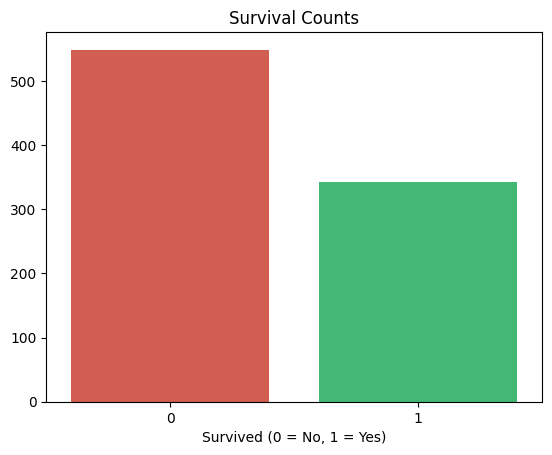

In [ ]:
# Quick look at survival count
sns.countplot(data=df, x='Survived', palette=['#e74c3c', '#2ecc71'])
plt.title('Survival Counts')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('')
plt.show()

We can see the majority of passengers did **not survive**, which is consistent with the known historical outcome of the Titanic disaster.

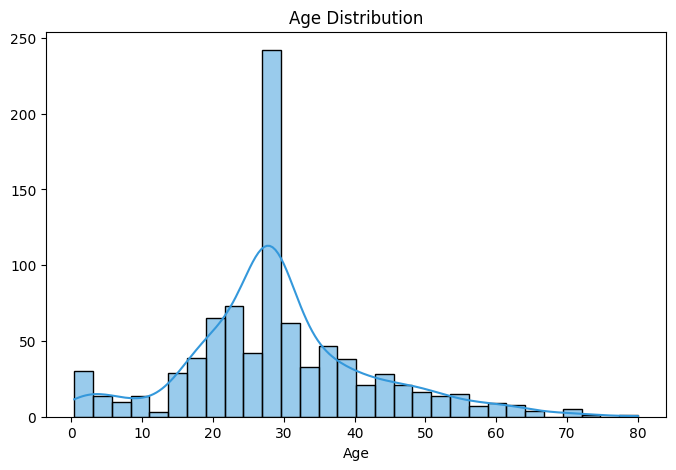

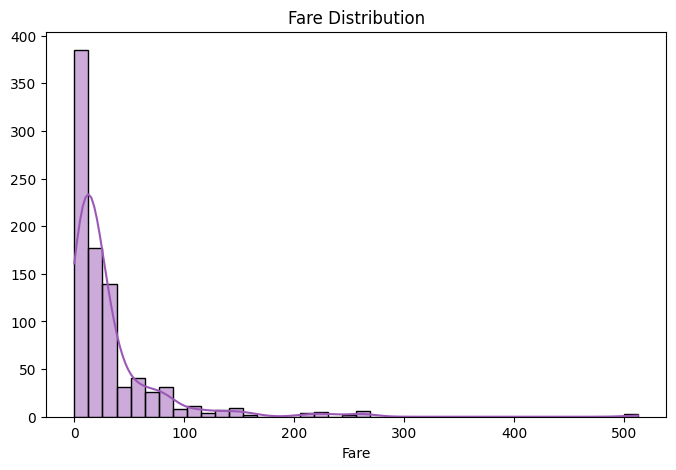

In [6]:
# Distribution of numerical features - 'Age' and 'Fare'
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], kde=True, bins=30, color='#3498db')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('')
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(df['Fare'], kde=True, bins=40, color='#9b59b6')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('')
plt.show()

- **Age** shows a roughly bell-shaped distribution, somewhat close to a normal (Gaussian) distribution. The presence of slight skewness and some gaps (due to previously missing values) is expected, but overall it's centered around 25–30 years old.

- **Fare**, on the other hand, is highly **right-skewed** — a classic long-tail distribution. Most passengers paid low to moderate fares, while a small number paid very high prices. This resembles a **power law** or **log-normal** distribution, which is typical in price or income-related variables.